# R & T Measurements

**Scott Prahl**

**July 2025**

To avoid the need to make absolute measurements, we adjust our sample measurement by using a known standard for reflection and a measurement of the background. We subtract the background and normalize by the light reflected from a reference standard.  This normalization means that we do not need to worry about variations in spectral sensitivity of the detector or of the light source.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import iadpython.sphere

%config InlineBackend.figure_format='retina'

## Reflection

If $P$ is the detected signal then the reflection measurement $M_R$ used by the inverse adding-doubling program is 

$$
M_R = r_\mathrm{standard} \cdot \frac{P_\mathrm{sample} - P_\mathrm{background}}{P_\mathrm{standard} - P_\mathrm{background}}
$$

where the three measurement of $P$ are described in the drawing below.

<center>
    <img src="sphereMR.png" width="80%" />
</center>

In this drawing, the baffle remains between the sample (or standard) and the detector.

### Difference between $M_R$ and true reflectance

We can observe four facts about the relationship between the measured reflectance and the true reflectance.

1) The measured reflectance $M_R$ only matches the true reflectance when it matches the reflection standard.  In this case the sphere efficiency for both measurements is the same and the sphere effects exactly cancel out.
   
2) When the sample is less reflective than the calibration standard, **$M_R$ will be less than the true reflectance** because the gain in the sphere is greater when the standard is in the sample port than when port is occupied by the sample.
   
3) $M_R$ can exceed 1 for samples that are more reflective than the standard (pink area in graph below).
   
4) The non-linearity increases with the wall reflectivity

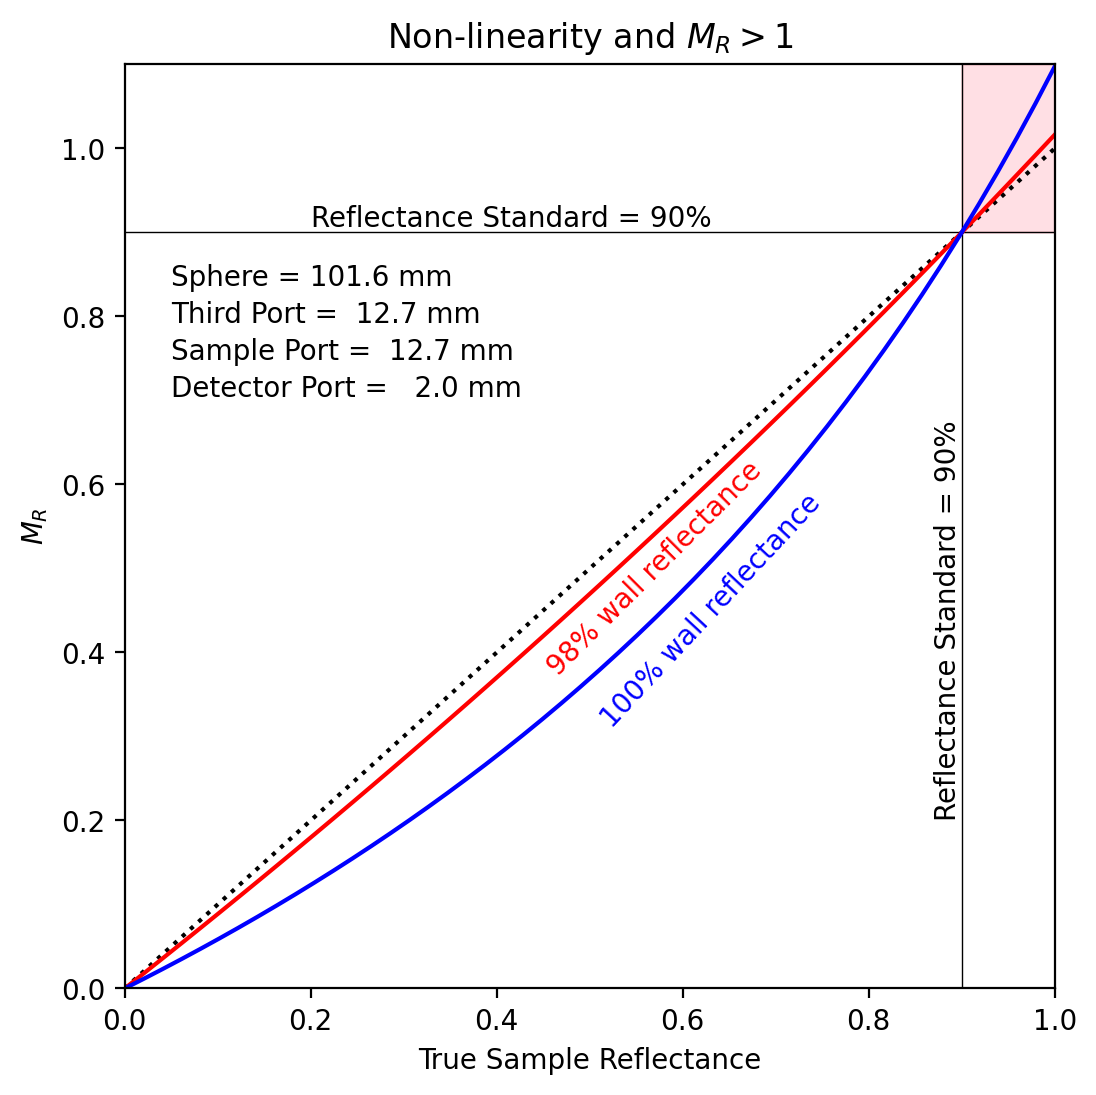

In [2]:
r_sample = np.linspace(0.0, 1, 50)
d_sphere = 25.4 * 4  # mm
d_sample = 25.4 / 2
d_third = 25.4 / 2
d_detector = 2
r_std = 0.9

s = iadpython.Sphere(
    d_sphere, d_sample, d_third=d_third, d_detector=d_detector, r_std=r_std
)
s.r_third = r_std

plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], "k:")
plt.axvline(r_std, color="black", lw=0.5)
plt.axhline(r_std, color="black", lw=0.5)
plt.axhspan(0.9, 1.1, 0.9, 1.1, color="pink", alpha=0.5)

s.r_wall = 0.98
plt.plot(r_sample, s.MR(r_sample), color="red")
plt.text(
    0.57,
    0.5,
    "%g%% wall reflectance" % (100 * s.r_wall),
    color="red",
    ha="center",
    va="center",
    rotation=45,
)

s.r_wall = 1.00
plt.plot(r_sample, s.MR(r_sample), color="blue")
plt.text(
    0.63,
    0.45,
    "%g%% wall reflectance" % (100 * s.r_wall),
    color="blue",
    ha="center",
    va="center",
    rotation=47,
)

plt.xlabel("True Sample Reflectance")
plt.ylabel("$M_R$")
plt.title("Non-linearity and $M_R>1$")
plt.text(
    0.05, 0.76, "Sphere = %5.1f mm " % s.d, ha="left", transform=plt.gca().transAxes
)
plt.text(
    0.05,
    0.72,
    "Third Port = %5.1f mm " % (s.third.d),
    ha="left",
    transform=plt.gca().transAxes,
)
plt.text(
    0.05,
    0.64,
    "Detector Port = %5.1f mm " % (s.detector.d),
    ha="left",
    transform=plt.gca().transAxes,
)
plt.text(
    0.05,
    0.68,
    "Sample Port = %5.1f mm " % (s.sample.d),
    ha="left",
    transform=plt.gca().transAxes,
)
plt.text(
    0.2,
    r_std,
    "Reflectance Standard = %g%% " % (100 * r_std),
    va="bottom",
    color="black",
)
plt.text(
    r_std - 0.03,
    0.2,
    "Reflectance Standard = %g%% " % (100 * r_std),
    va="bottom",
    color="black",
    rotation=90,
)
plt.xlim(0, 1.0)
plt.ylim(0, 1.1)
plt.show()

## Transmission

The idea is to subtract background and normalize by reflectance from a reference standard.  Again
$P$ is the detected signal

$$
M_T = r_\mathrm{standard} \cdot \frac{P_\mathrm{sample} - P_\mathrm{background}}{P_\mathrm{standard} - P_\mathrm{background}}
$$

There are three configurations supported.  

### First transmission configuration

The first is when the third port is just closed by a cap which has the same reflectivity as the sphere walls.  
<center>
    <img src="sphereMT.png" width="80%" />
</center>

The third port diameter should be set to zero. This is most commonly done by setting the size of the third port in the file header.

    # Transmission sphere properties
    101.6 # [mm] Sphere Diameter
    12.7  # [mm] Sample Port Diameter
    0     # [mm] Third Port Diameter
    2     # [mm] Detector Port Diameter
    0.98  # Reflectivity of the sphere wall

> This can also be accomplished on the command-line with `-2 '101.6 12.7 0 2 0.98'`

If this is done then the reflectance of the sphere wall will be used as the reflectivity of the third port when the gain is calculated for both the sample and standard measurements.


### Difference between $M_T$ and true transmission

We can observe a few facts about the relationship between the measured transmission and the true transmission.

Note, that we must make some sort of assumption about how the light from the sample is reflected back into the sphere.  In this case, I assume that the sample absorbs five percent of the light and use the fact that 
$$
1 = R + T + A
$$

1) Perfectly reflecting spheres have much more of an effect on the measurements because when the third port eliminated, light can no longer exit through the third port.
2) Sphere effects disappear when the sample reflectance is 0% because this at this point the gain for the sample and reference measurements match
3) The value of $M_T$ never exceeds unity.
4) The value of $M_T$ is always greater than the true transmission.  It is equal when nothing is transmitted or nothing is reflected by the sample (i.e., it is completely transparent)


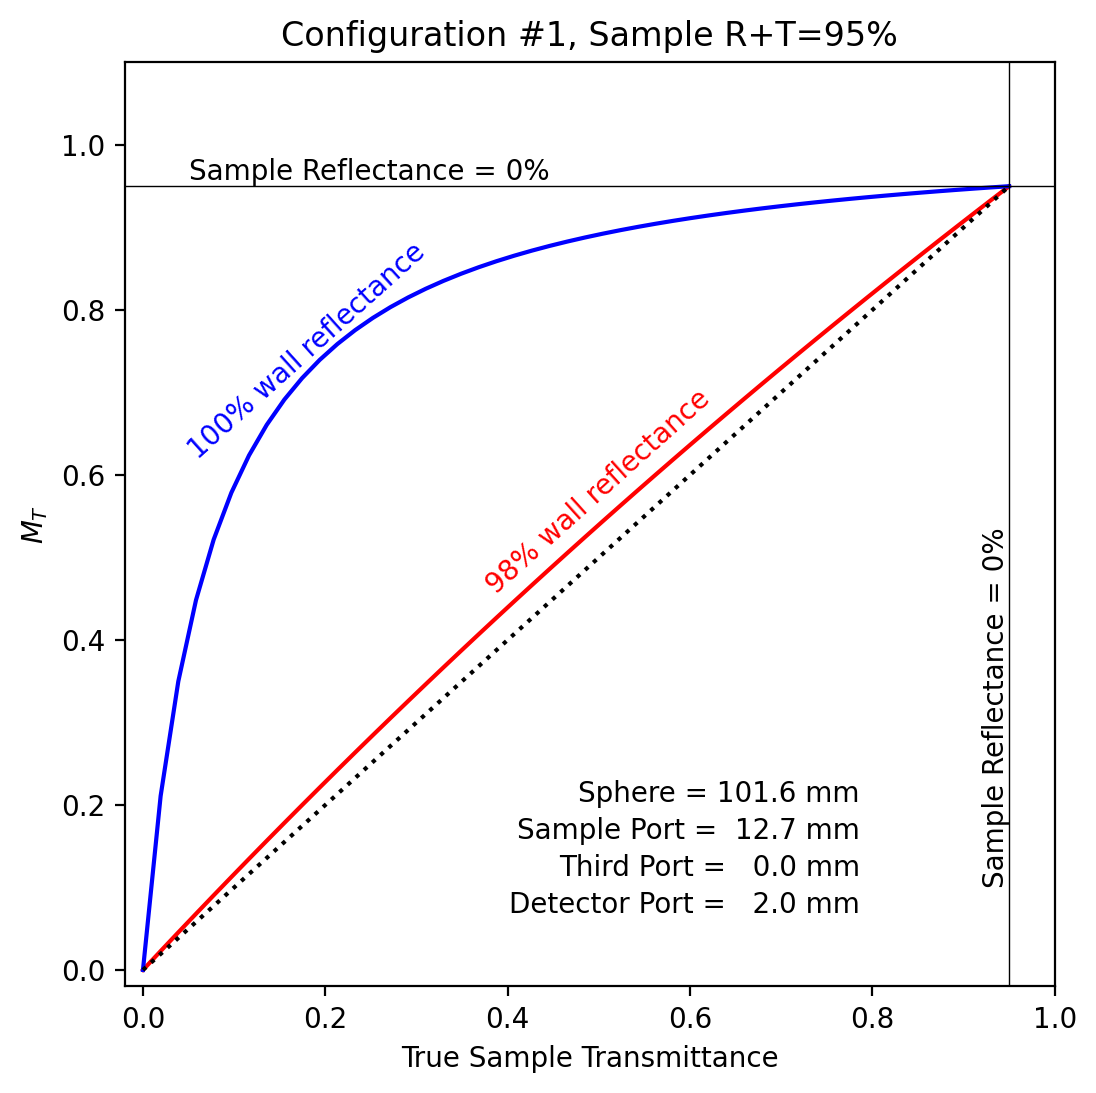

In [3]:
configuration = 1
abs_sample = 0.05
t_sample = np.linspace(0.0, 1 - abs_sample, 50)
r_sample = 1 - t_sample
d_sphere = 25.4 * 4  # mm
d_sample = 25.4 / 2
d_third = 0
d_detector = 2
r_std = 0.80
r_sample = 1 - t_sample - abs_sample

s = iadpython.Sphere(
    d_sphere, d_sample, d_third=d_third, d_detector=d_detector, r_std=r_std
)

plt.figure(figsize=(6, 6))

s.r_wall = 0.98
plt.plot(t_sample, s.MT(t_sample, r_sample), color="red")
plt.text(
    0.50,
    0.58,
    "%g%% wall reflectance" % (100 * s.r_wall),
    color="red",
    ha="center",
    va="center",
    rotation=42,
)

s.r_wall = 1.00
plt.plot(t_sample, s.MT(t_sample, r_sample), color="blue")
plt.text(
    0.18,
    0.75,
    "%g%% wall reflectance" % (100 * s.r_wall),
    color="blue",
    ha="center",
    va="center",
    rotation=42,
)

plt.plot([0, 1 - abs_sample], [0, 1 - abs_sample], ":k")
plt.axvline(1 - abs_sample, color="black", lw=0.5)
plt.axhline(1 - abs_sample, color="black", lw=0.5)

plt.xlabel("True Sample Transmittance")
plt.ylabel("$M_T$")
plt.title(
    "Configuration #%d, Sample R+T=%.0f%%" % (configuration, 100 * (1 - abs_sample))
)
plt.text(
    0.8, 0.20, "Sphere = %5.1f mm " % s.d, ha="right", transform=plt.gca().transAxes
)
plt.text(
    0.8,
    0.16,
    "Sample Port = %5.1f mm " % (s.sample.d),
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(
    0.8,
    0.12,
    "Third Port = %5.1f mm " % (s.third.d),
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(
    0.8,
    0.08,
    "Detector Port = %5.1f mm " % (s.detector.d),
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(0.05, 1 - abs_sample, "Sample Reflectance = 0% ", va="bottom", color="black")
plt.text(
    1 - abs_sample - 0.03,
    0.1,
    "Sample Reflectance = 0% ",
    va="bottom",
    color="black",
    rotation=90,
)
plt.xlim(-0.02, 1.0)
plt.ylim(-0.02, 1.1)
plt.show()

### Second transmission configuration

The second is when the reflectivity standard is kept in the third port for all the measurements:

<center>
    <img src="sphereMT2.png" width="80%" />
</center>

The third port diameter should be set to its size.  This is most commonly done by setting the size of the third port in the file header.

    # Transmission sphere properties
    101.6 # [mm] Sphere Diameter
    12.7  # [mm] Sample Port Diameter
    12.7  # [mm] Third Port Diameter
    2.0   # [mm] Detector Port Diameter
    0.98  # Reflectivity of the sphere wall

> This can also be accomplished using the command-line option `-2 '101.6 12.7 12.7 2 0.98'`

With these parameters, the reflectance of the standard will be used as the reflectivity of the third port when the gain is calculated for both the sample and standard measurements.


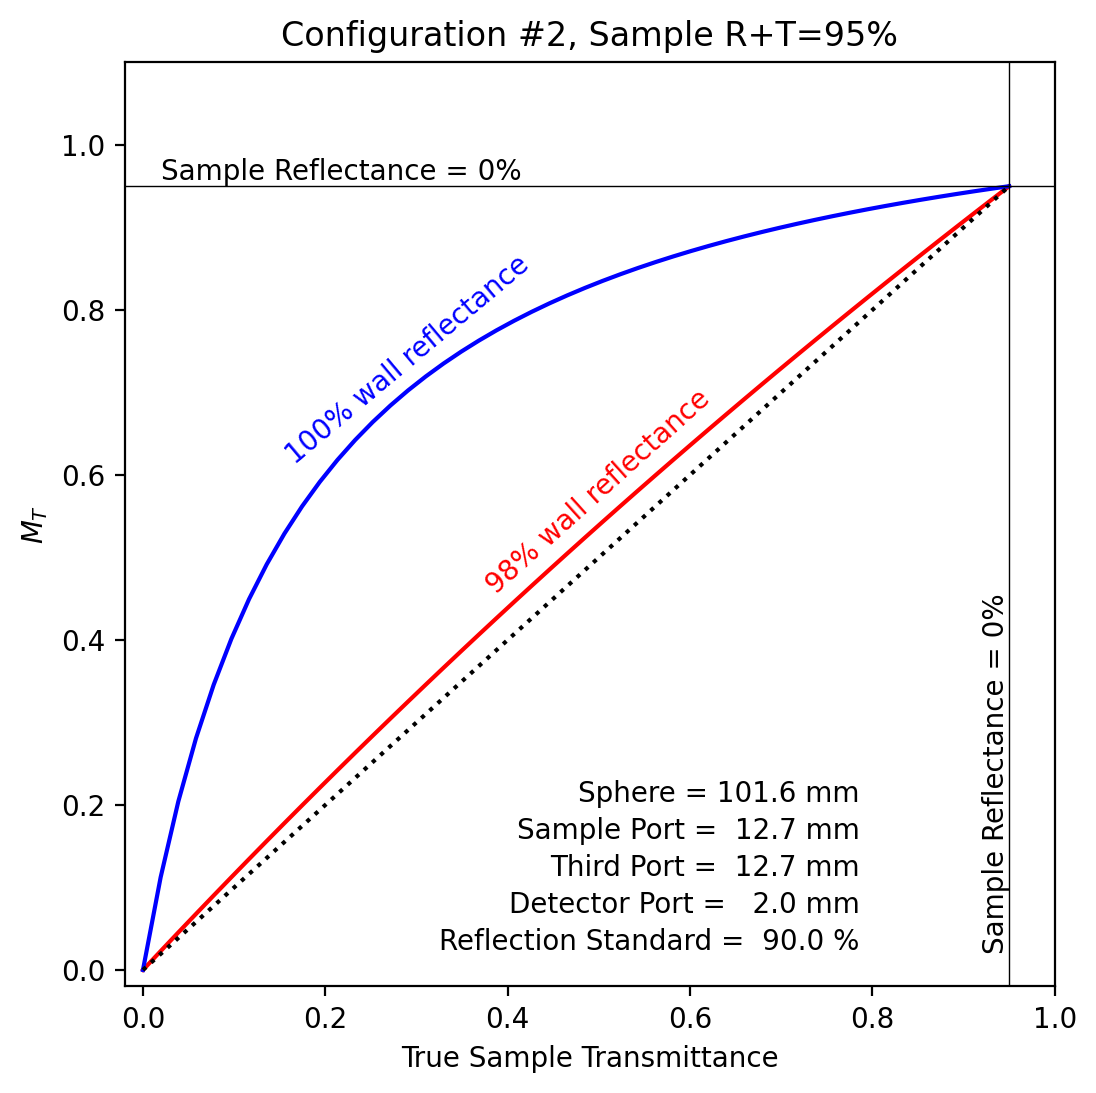

In [4]:
configuration = 2
abs_sample = 0.05
t_sample = np.linspace(0.0, 1 - abs_sample, 50)
r_sample = 1 - t_sample
d_sphere = 25.4 * 4  # mm
d_sample = 25.4 / 2
d_third = 25.4 / 2
d_detector = 2
r_std = 0.90
r_sample = 1 - t_sample - abs_sample

s = iadpython.Sphere(
    d_sphere, d_sample, d_third=d_third, d_detector=d_detector, r_std=r_std
)

plt.figure(figsize=(6, 6))

s.r_wall = 0.98
plt.plot(t_sample, s.MT(t_sample, r_sample), color="red")
plt.text(
    0.50,
    0.58,
    "%g%% wall reflectance" % (100 * s.r_wall),
    color="red",
    ha="center",
    va="center",
    rotation=42,
)

s.r_wall = 1.00
plt.plot(t_sample, s.MT(t_sample, r_sample), color="blue")
plt.text(
    0.29,
    0.74,
    "%g%% wall reflectance" % (100 * s.r_wall),
    color="blue",
    ha="center",
    va="center",
    rotation=40,
)

plt.plot([0, 1 - abs_sample], [0, 1 - abs_sample], ":k")
plt.axvline(1 - abs_sample, color="black", lw=0.5)
plt.axhline(1 - abs_sample, color="black", lw=0.5)

plt.xlabel("True Sample Transmittance")
plt.ylabel("$M_T$")
plt.title(
    "Configuration #%d, Sample R+T=%.0f%%" % (configuration, 100 * (1 - abs_sample))
)
plt.text(
    0.8, 0.20, "Sphere = %5.1f mm " % s.d, ha="right", transform=plt.gca().transAxes
)
plt.text(
    0.8,
    0.16,
    "Sample Port = %5.1f mm " % (s.sample.d),
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(
    0.8,
    0.12,
    "Third Port = %5.1f mm " % (s.third.d),
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(
    0.8,
    0.08,
    "Detector Port = %5.1f mm " % (s.detector.d),
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(
    0.8,
    0.04,
    "Reflection Standard = %5.1f %% " % (s.r_std * 100),
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(0.02, 1 - abs_sample, "Sample Reflectance = 0% ", va="bottom", color="black")
plt.text(
    1 - abs_sample - 0.03,
    0.02,
    "Sample Reflectance = 0% ",
    va="bottom",
    color="black",
    rotation=90,
)
plt.xlim(-0.02, 1.0)
plt.ylim(-0.02, 1.1)
plt.show()

### Third transmission configuration

The third is when the unscattered transmitted light is allowed to leave the sphere.  Obviously, the third port must be covered with the standard for the transmission normalization

<center>
    <img src="sphereMT3.png" width="80%" />
</center>

The third port diameter should be set to its size.  This is most commonly done by setting the size of the third port in the file header.

    # Transmission sphere properties
    101.6   # [mm] Sphere Diameter
    12.7    # [mm] Sample Port Diameter
    12.7    # [mm] Third Port Diameter
    2.0     # [mm] Detector Port Diameter
    0.995   # Reflectivity of the sphere wall

**The command-line option `-C 0` must be used** to indicate that no unscattered transmitted light is included in the transmission measurement.  The lets the program know to set the reflectivity of the third port to zero when calculating the sphere gain for a sample measurement (the gain for the standard measurement uses the reflectance of the standard and sets the reflectivity of the sample to zero).

> This can also be accomplished on the command-line with `-C 0 -2 '101.6 12.7 12.7 2 0.995'`

In any case, this configuration gives quite different results than the previous two because the sphere efficiency is greater in calibration measurement than for transparent sample.  If the sample and exit ports are equal in size and the detector is small, light has twice the opportunity to leave the sphere in the transparent sample case than in the calibration configuration.

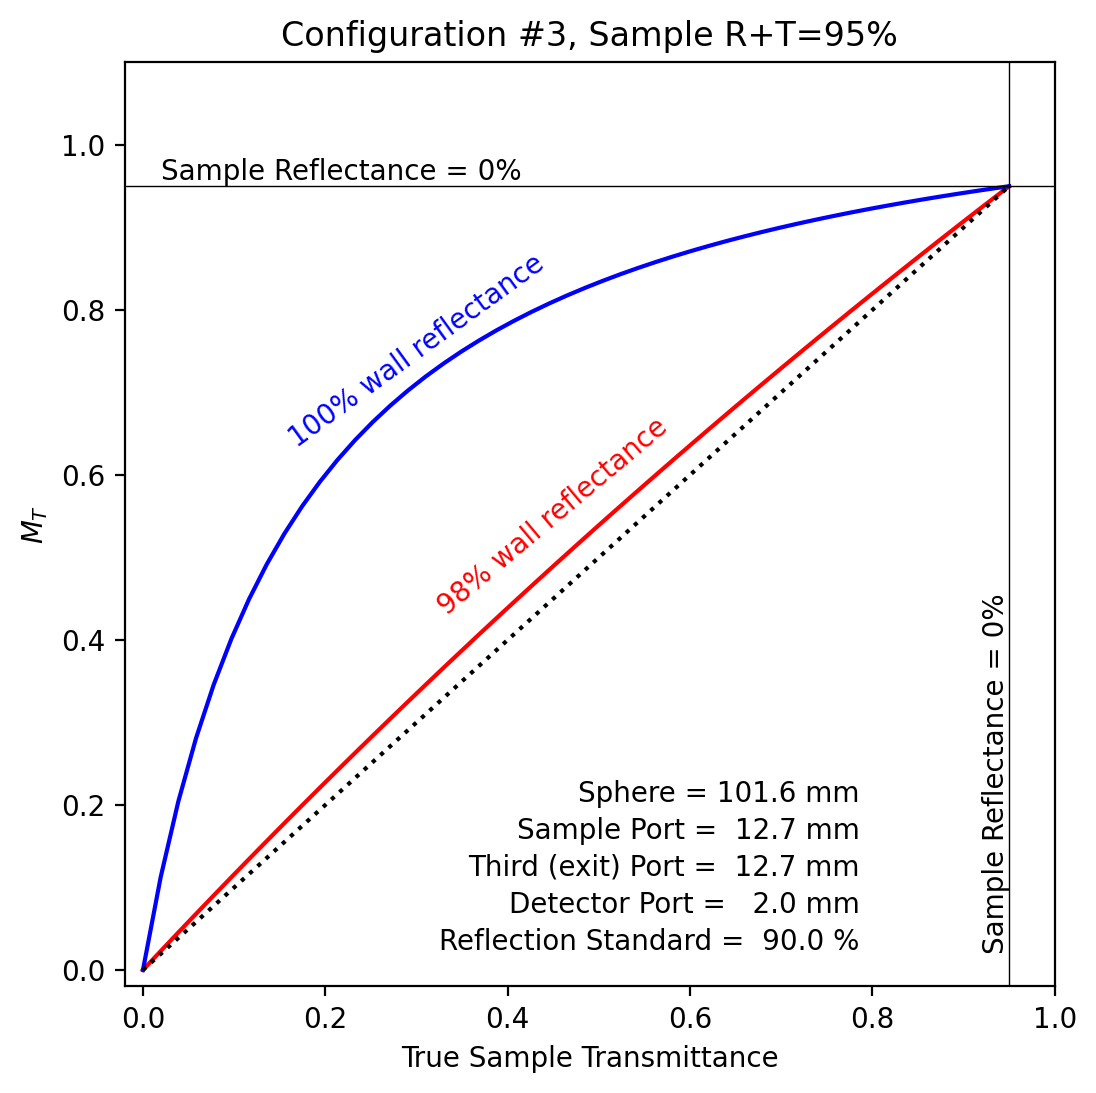

In [5]:
configuration = 3
abs_sample = 0.05
d_sphere = 25.4 * 4  # mm
d_sample = 25.4 / 2
d_third = 25.4 / 2
d_detector = 2
r_std = 0.90
t_sample = np.linspace(0.0, 1 - abs_sample, 50)
r_sample = 1 - t_sample - abs_sample

s = iadpython.Sphere(
    d_sphere, d_sample, d_third=d_third, d_detector=d_detector, r_std=r_std
)

plt.figure(figsize=(6, 6))

s.r_wall = 0.98
plt.plot(t_sample, s.MT(t_sample, r_sample), color="red")
plt.text(
    0.45,
    0.55,
    "%g%% wall reflectance" % (100 * s.r_wall),
    color="red",
    ha="center",
    va="center",
    rotation=40,
)

s.r_wall = 1.00
plt.plot(t_sample, s.MT(t_sample, r_sample), color="blue")
plt.text(
    0.3,
    0.75,
    "%g%% wall reflectance" % (100 * s.r_wall),
    color="blue",
    ha="center",
    va="center",
    rotation=36,
)

plt.plot([0, 1 - abs_sample], [0, 1 - abs_sample], ":k")
plt.axvline(1 - abs_sample, color="black", lw=0.5)
plt.axhline(1 - abs_sample, color="black", lw=0.5)

plt.xlabel("True Sample Transmittance")
plt.ylabel("$M_T$")
plt.title(
    "Configuration #%d, Sample R+T=%.0f%%" % (configuration, 100 * (1 - abs_sample))
)
plt.text(
    0.8, 0.20, "Sphere = %5.1f mm " % s.d, ha="right", transform=plt.gca().transAxes
)
plt.text(
    0.8,
    0.16,
    "Sample Port = %5.1f mm " % (s.sample.d),
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(
    0.8,
    0.12,
    "Third (exit) Port = %5.1f mm " % (s.third.d),
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(
    0.8,
    0.08,
    "Detector Port = %5.1f mm " % (s.detector.d),
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(
    0.8,
    0.04,
    "Reflection Standard = %5.1f %% " % (s.r_std * 100),
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(0.02, 1 - abs_sample, "Sample Reflectance = 0% ", va="bottom", color="black")
plt.text(
    1 - abs_sample - 0.03,
    0.02,
    "Sample Reflectance = 0% ",
    va="bottom",
    color="black",
    rotation=90,
)
plt.xlim(-0.02, 1.0)
plt.ylim(-0.02, 1.1)
plt.show()

## Non-absorbing samples

Since the measured values of $M_R$ and $M_T$ are not true reflection and transmission values, the sum of the two can exceed unity.  

Here we look at a non-absorbing sample with different true reflection values $R$ and $T=1-R$

We notice that $M_R+M_T$ can be dramatically higher than 100% when the sphere wall reflectivity is 100%.  

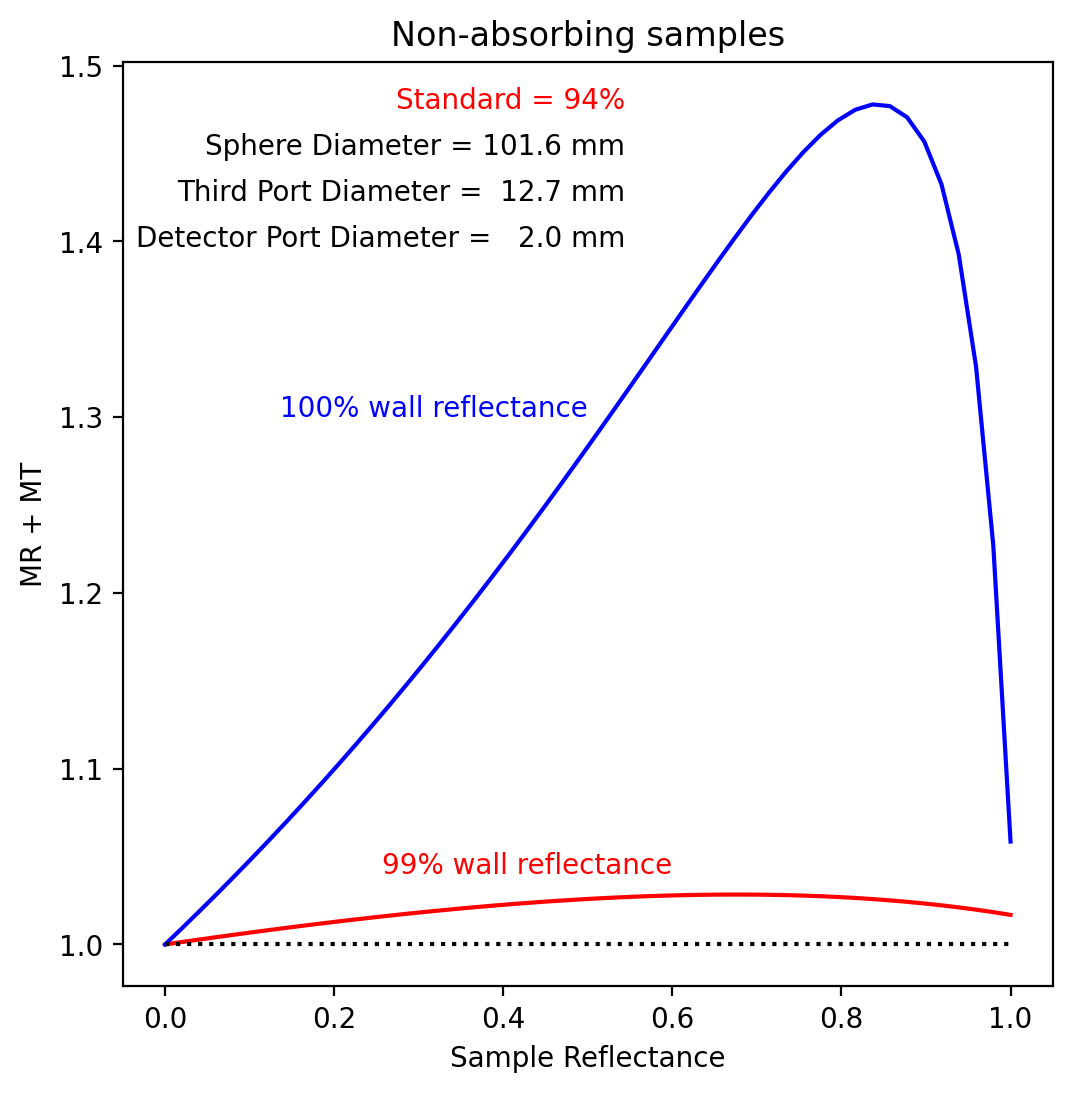

In [6]:
t_sample = np.linspace(0.0, 1, 50)
r_sample = 1 - t_sample
d_sphere = 25.4 * 4  # mm
d_sample = 25.4 / 2

s = iadpython.Sphere(d_sphere, d_sample, d_third=25.4 / 2, d_detector=2)
r_std = 0.94
s.r_std = r_std
s.r_third = r_std

plt.figure(figsize=(6, 6))
s.r_wall = 0.99
MT = s.MT(t_sample, r_sample)
MR = s.MR(r_sample)

plt.plot(r_sample, MR + MT, color="red")
plt.text(0.6, 1.04, "%g%% wall reflectance" % (100 * s.r_wall), color="red", ha="right")

s.r_wall = 1.00
MT = s.MT(t_sample, r_sample)
MR = s.MR(r_sample)
plt.plot(r_sample, MR + MT, color="blue")
plt.text(0.5, 1.3, "%g%% wall reflectance" % (100 * s.r_wall), color="blue", ha="right")

plt.plot([0, 1], [1, 1], ":k")

plt.xlabel("Sample Reflectance")
plt.ylabel("MR + MT")
plt.title("Non-absorbing samples")
plt.text(
    0.55,
    0.90,
    "Sphere Diameter = %5.1f mm " % s.d,
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(
    0.55,
    0.85,
    "Third Port Diameter = %5.1f mm " % (s.third.d),
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(
    0.55,
    0.80,
    "Detector Port Diameter = %5.1f mm " % (s.detector.d),
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(
    0.55,
    0.95,
    "Standard = %g%% " % (100 * r_std),
    ha="right",
    transform=plt.gca().transAxes,
    color="red",
)
plt.show()

The effect is much small when the sphere wall reflectivity is a much more realistic 98%

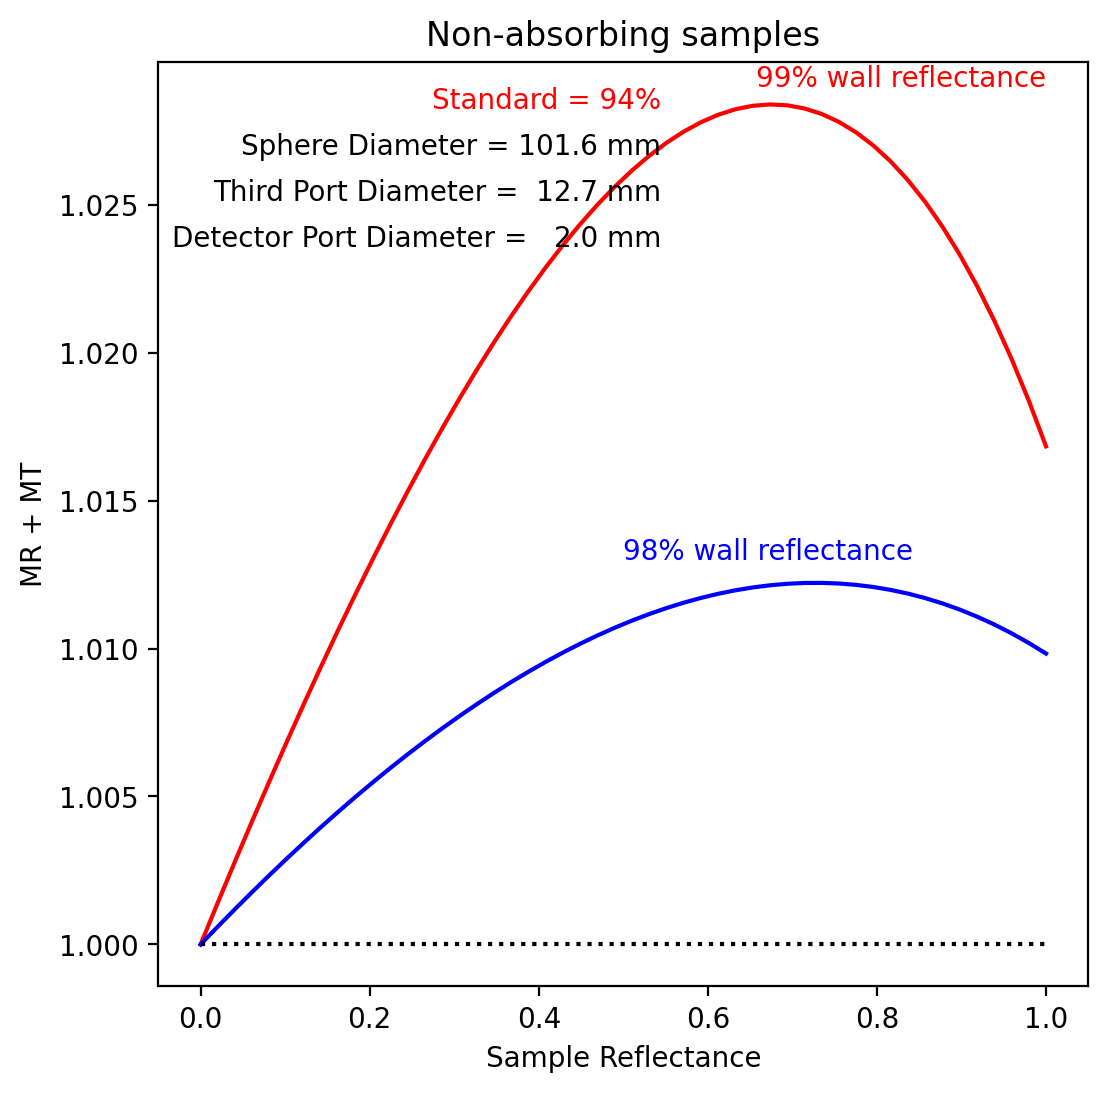

In [7]:
t_sample = np.linspace(0.0, 1, 50)
r_sample = 1 - t_sample
d_sphere = 25.4 * 4  # mm
d_sample = 25.4 / 2

s = iadpython.Sphere(d_sphere, d_sample, d_third=25.4 / 2, d_detector=2)
r_std = 0.94
s.r_std = r_std
s.r_third = r_std

plt.figure(figsize=(6, 6))
s.r_wall = 0.99
MT = s.MT(t_sample, r_sample)
MR = s.MR(r_sample)

plt.plot(r_sample, MR + MT, color="red")
plt.text(
    1.0, 1.029, "%g%% wall reflectance" % (100 * s.r_wall), color="red", ha="right"
)

s.r_wall = 0.98
MT = s.MT(t_sample, r_sample)
MR = s.MR(r_sample)
plt.plot(r_sample, MR + MT, color="blue")
plt.text(
    0.5, 1.013, "%g%% wall reflectance" % (100 * s.r_wall), color="blue", ha="left"
)

plt.plot([0, 1], [1, 1], ":k")

plt.xlabel("Sample Reflectance")
plt.ylabel("MR + MT")
plt.title("Non-absorbing samples")
plt.text(
    0.55,
    0.90,
    "Sphere Diameter = %5.1f mm " % s.d,
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(
    0.55,
    0.85,
    "Third Port Diameter = %5.1f mm " % (s.third.d),
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(
    0.55,
    0.80,
    "Detector Port Diameter = %5.1f mm " % (s.detector.d),
    ha="right",
    transform=plt.gca().transAxes,
)
plt.text(
    0.55,
    0.95,
    "Standard = %g%% " % (100 * r_std),
    ha="right",
    transform=plt.gca().transAxes,
    color="red",
)
plt.show()

## Measuring wall reflectivity

**THIS SECTION STILL NEEDS WORK**

Consider the following experiment

<center>
    <img src="sphere-wall.png" width="60%" />
</center>

The baffle prevents the initial reflection from the sphere wall from reaching the detector.  Thus the diffuse light in the sphere will be $P = r_w \cdot (1-a_e) r_w P_0$. The normalized optical power falling on the detector port will be

$$
P_d^\mathrm{nothing} = a_d (1-a_e) r_w G_\text{baffle}(0) \cdot  r_w P_0
$$

$$
P_d^\mathrm{standard} = a_d (1-a_e) r_w G_\text{baffle}(r_\mathrm{standard}) \cdot  r_w P_0
$$

so

$$
P_d^\mathrm{standard} - P_d^\mathrm{nothing} = a_d (1-a_e) r_w [G_\text{baffle}(r_\mathrm{standard}) - G_\text{baffle}(0)] \cdot  r_w P_0 
$$

$$
\frac{P_d^\mathrm{standard}}{P_d^\mathrm{standard} - P_d^\mathrm{nothing}} = \frac{G_\text{baffle}(r_\mathrm{standard})}{ G_\text{baffle}(r_\mathrm{standard}) - G_\text{baffle}(0)}
$$

If $\gamma$ is defined as

$$
\gamma = \frac{P_d^\mathrm{standard}}{P_d^\mathrm{standard}-P_d^\mathrm{nothing}}
$$

then the wall reflectivity is

$$
r_w  = \frac{1}{a_w + (1-a_e)(a_d r_d + a_s r_\mathrm{std}\gamma )}
$$

In [8]:
def gain(a_s, rs, ad, rd, ae, rw):
    """Gain for sphere with no baffle."""
    aw = 1 - ae - ad - a_s
    denom = 1 - rw * aw - rw * (1 - ae) * (ad * rd + a_s * rs)
    return 1 / denom


def rww(a_s, rs, ad, rd, ae, gamma):
    """Calculate the wall reflectivity using gamma."""
    aw = 1 - ae - ad - a_s
    denom = aw + (1 - ae) * (ad * rd + a_s * rs * gamma)
    return 1 / denom

First make sure the functions above work.  

In [9]:
d = 100  # mm diameter of sphere
ds = 10  # mm diameter of sample port
de = 20  # mm diameter of entrance port
dd = 5  # mm diameter of detector port

# normalize port areas to that of the entire sphere
A = 4 * np.pi * (d / 2) ** 2
ae = np.pi * (de / 2) ** 2 / A
ad = np.pi * (dd / 2) ** 2 / A
a_s = np.pi * (ds / 2) ** 2 / A

rd = 0.2
rstd = 0.99
rw = 0.95

p_std = gain(a_s, rstd, ad, rd, ae, rw)
p_none = gain(a_s, 0, ad, rd, ae, rw)

print("         P_std = %8.3f" % p_std)
print("        P_none = %8.3f" % p_none)
print("P_std - P_none = %8.3f" % (p_std - p_none))

gamma = p_std / (p_std - p_none)

print("gamma=%8.5f" % gamma)

RW = rww(a_s, rstd, ad, rd, ae, gamma)
print()
print("%.4f should equal %.4f" % (RW, rw))

         P_std =   16.660
        P_none =   16.038
P_std - P_none =    0.622
gamma=26.78618

0.9500 should equal 0.9500


Here we see that for typical sphere wall reflectivities (for a 100mm sphere) the values of gamma will range from 9 to 18.  This means that the difference between the measurement with and without the standard will be one tenth to one twentieth of the standard measurement alone.

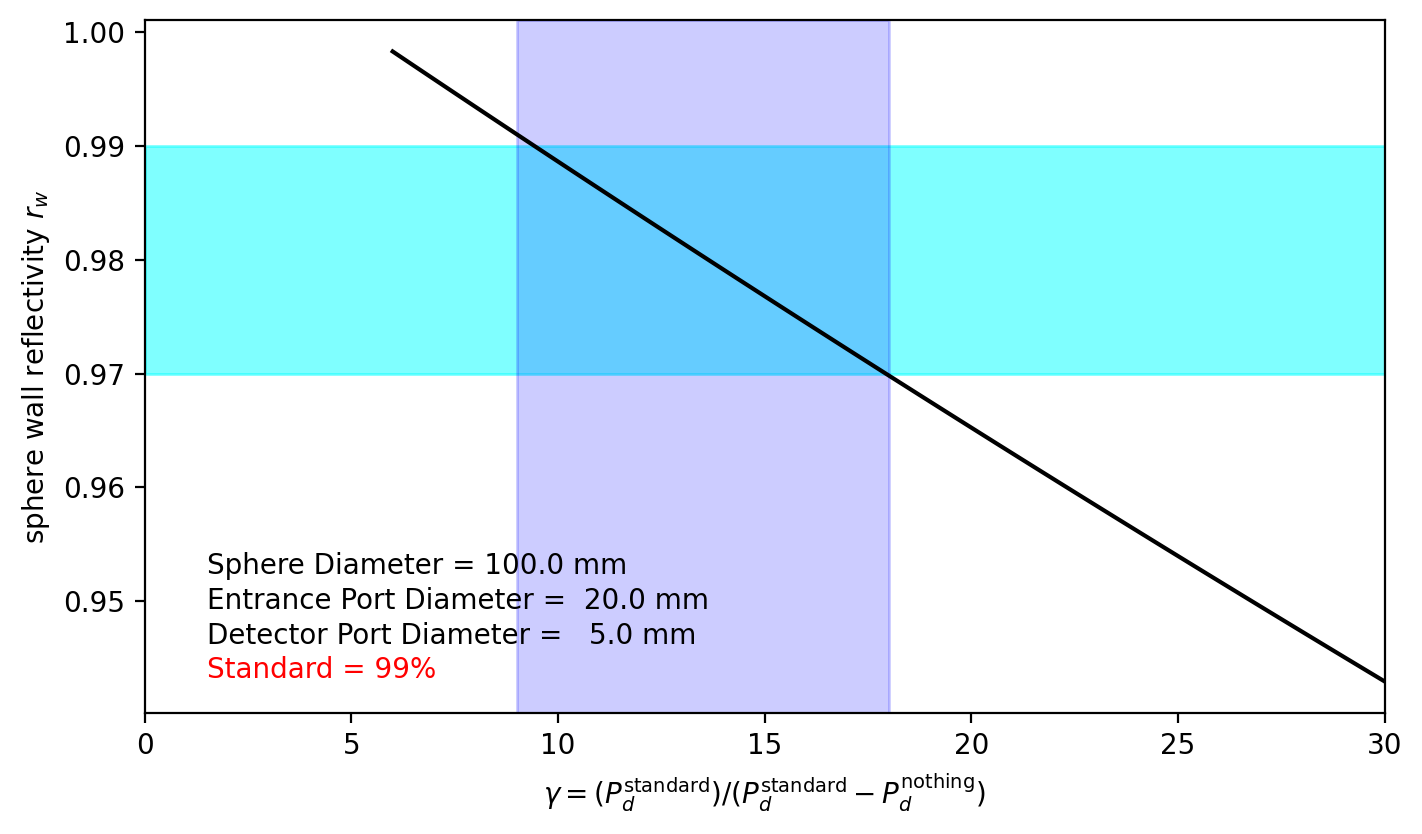

In [10]:
d = 100  # mm diameter of sphere
d_s = 10  # mm diameter of sample port
d_e = 20  # mm diameter of entrance port
d_d = 5  # mm diameter of detector port

r_d = 0.2
r_std = 0.99

s = iadpython.Sphere(d, d_s, d_third=d_e, d_detector=d_d, r_detector=r_d, r_std=r_std)

# normalize port areas to that of the entire sphere
A = 4 * np.pi * (d / 2) ** 2
a_e = np.pi * (de / 2) ** 2 / A
a_d = np.pi * (dd / 2) ** 2 / A
a_s = np.pi * (d_s / 2) ** 2 / A

gamma = np.linspace(6, 30)
RW = rww(a_s, r_std, a_d, r_d, a_e, gamma)

plt.figure(figsize=(8, 4.5))
plt.plot(gamma, RW, "k")
plt.xlim(0, 30)
plt.xlabel(
    r"$\gamma = (P_d^\mathrm{standard}) / (P_d^\mathrm{standard}-P_d^\mathrm{nothing})$"
)
plt.ylabel("sphere wall reflectivity $r_w$")

plt.text(
    0.05,
    0.20,
    "Sphere Diameter = %5.1f mm " % s.d,
    ha="left",
    transform=plt.gca().transAxes,
)
plt.text(
    0.05,
    0.15,
    "Entrance Port Diameter = %5.1f mm " % (s.third.d),
    ha="left",
    transform=plt.gca().transAxes,
)
plt.text(
    0.05,
    0.10,
    "Detector Port Diameter = %5.1f mm " % (s.detector.d),
    ha="left",
    transform=plt.gca().transAxes,
)
plt.text(
    0.05,
    0.05,
    "Standard = %g%% " % (100 * r_std),
    ha="left",
    transform=plt.gca().transAxes,
    color="red",
)

plt.axhspan(0.97, 0.99, color="cyan", alpha=0.5)
plt.axvspan(9, 18, color="blue", alpha=0.2)
plt.show()